In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("g:\Data Analysis\Projects\HEALTH CARE DATASET")
#url ="/kaggle/input/healthcare-dataset/healthcare_dataset.csv"
df=pd.read_csv('healthcare_dataset.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
 15  Unnamed: 15         2 non-null      object 
dtypes: fl

In [5]:
#no null values found

In [6]:
df.isnull().sum()

Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                   0
Hospital                 0
Insurance Provider       0
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication               0
Test Results             0
Unnamed: 15           9998
dtype: int64

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


In [9]:
#separating contineous and contigeous variables
cat=list(df.columns[df.dtypes=='object'])
cat

['Name',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results',
 'Unnamed: 15']

In [10]:
con=list(df.columns[df.dtypes!='object'])
con

['Age', 'Billing Amount', 'Room Number']

In [11]:
#dates are in object format--->change to date time 
for date in ['Date of Admission' , 'Discharge Date']:
    df[date] = pd.to_datetime(df[date])

#calculate no of days patient was in hospital
df['Days_admitted'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
#df['Days_admitted'] = df['Days_admitted'].astype(int)
df['Days_admitted']

0      -309
1       160
2       -30
3        29
4      -211
       ... 
9995   -171
9996   -123
9997    189
9998    -97
9999     24
Name: Days_admitted, Length: 10000, dtype: int64

In [12]:
#df=pd.DataFrame
condition_counts = df.groupby(['Medical Condition', 'Gender']).size().sort_values().unstack()
condition_counts

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


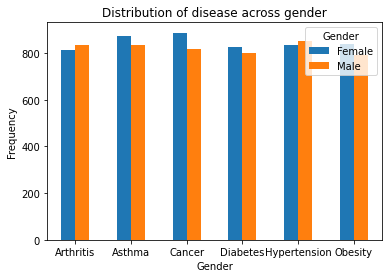

In [13]:
condition_counts.plot(kind = 'bar')
plt.title('Distribution of disease across gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [14]:
len_days = df.groupby('Medical Condition')['Days_admitted'].mean()
len_days

Medical Condition
Arthritis       20.406667
Asthma          15.434426
Cancer          12.201996
Diabetes        15.794208
Hypertension    13.501777
Obesity         16.990172
Name: Days_admitted, dtype: float64

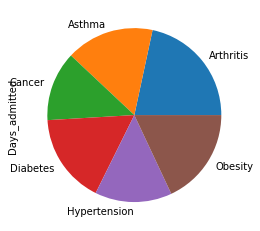

In [15]:
len_days.plot(kind='pie')
plt.show()

In [16]:
#disease wise avg billing amount
avg_bill = df.groupby('Medical Condition')['Billing Amount'].mean()
avg_bill

Medical Condition
Arthritis       25187.631255
Asthma          25416.869895
Cancer          25539.096133
Diabetes        26060.116129
Hypertension    25198.033973
Obesity         25720.842683
Name: Billing Amount, dtype: float64

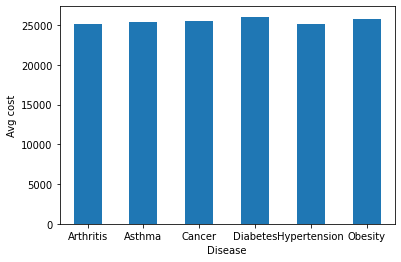

In [17]:
avg_bill.plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Avg cost')
plt.xticks(rotation=0)
plt.show()

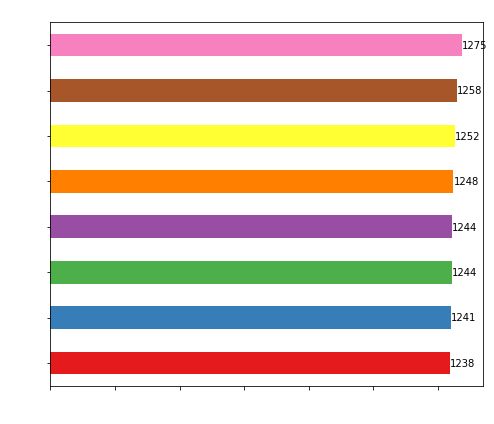

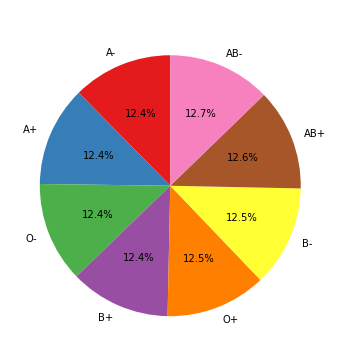

In [18]:
#9.	DISTRIBUTION OF BLOOD TYPE, INSURANCE PROVIDER, ADMISSION TYPE, TEST RESULT
bloodtype_count = df['Blood Type'].value_counts().sort_values(ascending=True)
bloodtype_count

bloodtype_count.plot(kind='barh' , color= plt.cm.Set1.colors, figsize=(7,6))
plt.ylabel('Count', color='white')
plt.xlabel('Blood Type' , color='white')
plt.title('Count of blood types', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for index,value in enumerate(bloodtype_count):
            plt.text(value,index,str(value),fontsize = 10,va = 'center', color='black')


plt.tight_layout()

plt.figure(figsize=(6, 6))  # Set the size of the figure

plt.pie(bloodtype_count, labels=bloodtype_count.index, autopct='%1.1f%%', colors= plt.cm.Set1.colors, startangle=90)
plt.title('Distribution of Blood Types', color='white')
plt.show()

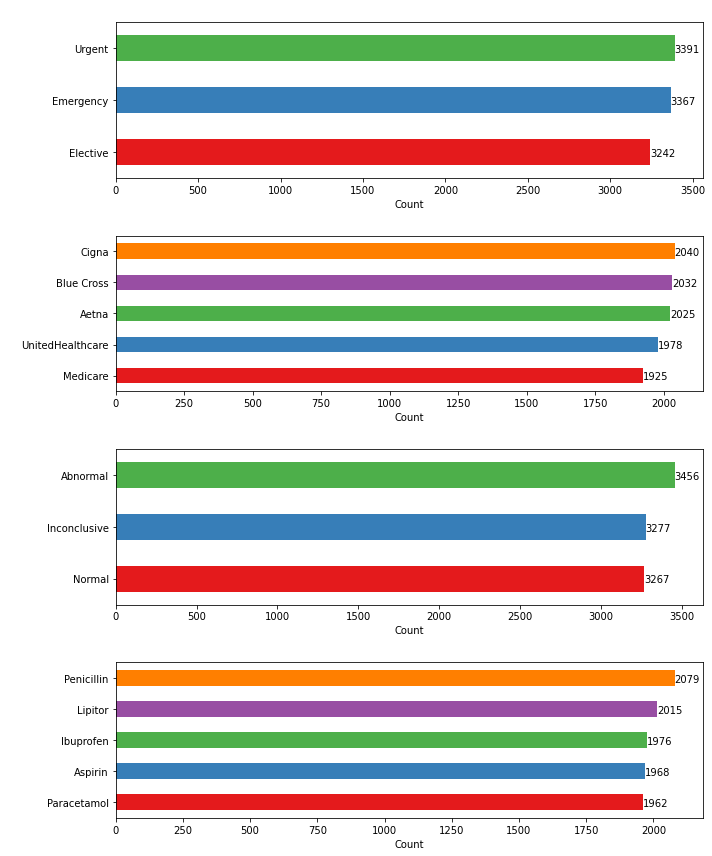

In [50]:
colums_viz=['Admission Type' ,'Insurance Provider', 'Test Results', 'Medication' ]

#creating subplot
fig, ax = plt.subplots(nrows=len(colums_viz) , figsize=(10,3 * len(colums_viz)))

for i,column in enumerate(colums_viz):
    category_count=df[column].value_counts().sort_values(ascending=True)
    #print(category_count)

    category_count.plot(kind='barh' , color= plt.cm.Set1.colors, ax=ax[i])
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel('Count')
    ax[i].set_title(f'Count of {column}s', color='white')

    for index, value in enumerate(category_count):
        ax[i].text(value, index, str(value), fontsize=10, va='center_baseline')

plt.tight_layout()       
plt.show()

  

In [20]:
#DISTRIBUTION OF AGE GROUP
min_age=df['Age'].min()
max_age=df['Age'].max()
print(min_age ,',', max_age)

18 , 85


<function matplotlib.pyplot.show(close=None, block=None)>

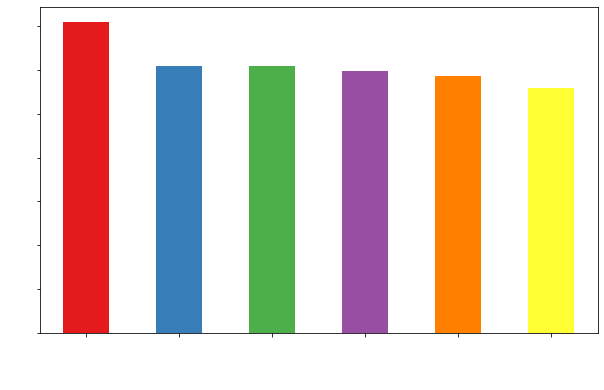

In [64]:
df['Age group']=pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30' , '31-40', '41-50', '51-60', '61-70','71-80'], right=False)
age_group=df['Age group'].value_counts().sort_values(ascending=False)
age_group

plt.figure(figsize=(10, 6))
age_group.plot(kind='bar', color= plt.cm.Set1.colors)
plt.xlabel('Age group', color='white')
plt.ylabel('')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show

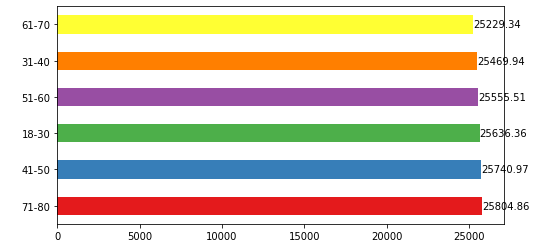

In [61]:
#dist of age & billing amt
avg_bills = df.groupby('Age group')['Billing Amount'].mean().sort_values(ascending=False)
avg_bills=avg_bills.round(2)

avg_bills.plot(kind='barh', figsize=(8,4), color= plt.cm.Set1.colors)
plt.xlabel('')
plt.ylabel(' ')
for i, v in enumerate(avg_bills):
    plt.text(v, i, str(v), fontsize=10, va='center')
# for index,value in enumerate(bloodtype_count):
#             plt.text(value,index,str(value),fontsize = 10,va = 'center', color='black')
plt.show()

In [26]:
#11.	CORRELATION BETWEEN BILLING AMOUNT, LENGTH OF STAY, TEST RESULT, MEDICAL CONDITION
corr_col = ['Billing Amount', 'Days_admitted', 'Age']

#creating df
corr_df=df[corr_col]

corr_df['Gender'] = df['Gender'].astype('category').cat.codes  
corr_df['Admission Type'] = df['Admission Type'].astype('category').cat.codes  
#corr_df['Gender'] = df['Gender'].astype('categor').cat.codes  

corr_mat=corr_df.corr()
corr_mat

,Billing Amount,Days_admitted,Age,Gender,Admission Type
Billing Amount,1.000000,-0.002737,-0.009483,0.002340,0.002531
Days_admitted,-0.002737,1.000000,-0.023609,0.009195,-0.000117
Age,-0.009483,-0.023609,1.000000,-0.008099,0.003233
Gender,0.002340,0.009195,-0.008099,1.000000,-0.004515
Admission Type,0.002531,-0.000117,0.003233,-0.004515,1.000000


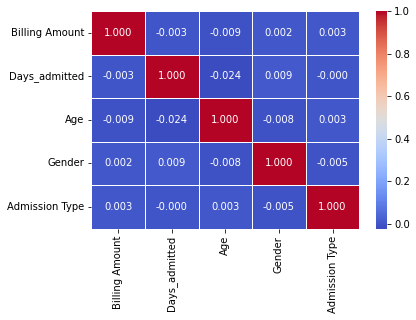

In [33]:
plt.figure(14.6)
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt= '.3f', linewidths=0.5)
plt.show()

In [57]:
#top 10 hosipitals per billing amount
top_5_hosp = df.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending=False)[:5]

top_5_hosp=top_5_hosp.round(2)
top_5_hosp

Hospital
Smith and Sons    477638.88
Smith PLC         432283.55
Smith Ltd         428163.07
Smith Inc         351463.89
Williams LLC      327522.47
Name: Billing Amount, dtype: float64

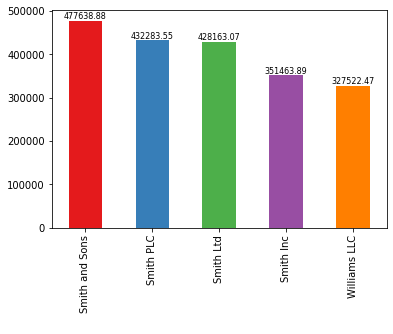

In [58]:
top_5_hosp.plot(kind='bar' ,  color= plt.cm.Set1.colors)
plt.xlabel('Hospital Name', color= 'white')
plt.ylabel('')
for i, v in enumerate(top_5_hosp):
    plt.text(i, v, str(v), fontsize=8, ha='center', va='bottom')
plt.show()